In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from tqdm import tqdm
#import utils
from time import time
import pickle
%load_ext autoreload
%autoreload 2


Bad key "text.kerning_factor" on line 4 in
/clusteruy/home/cmarino/miniconda3/envs/mine/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [31]:
D = np.load('arrays/D_all.npy')
X = np.load('arrays/X.npy')

# Problema a resolver
Se intenta resolver un problema similar al del paper https://arxiv.org/pdf/1704.07308.pdf. El problema es el siguiente:
$$min_A ||X - DA||_{F}^2$$

$$\text{ s.t. $A_{i,j}>0$ $\forall i,j$}$$

- $D$ (Matriz de diccionario): Es una matriz cuyas columnas son las bases del consumo de energeia electrico (se espera poder estimar el consumo sea una combinación lineal de estos vectores).

- $X$ (Matriz de datos a proyectar): Es una matriz en la que cada columna representa el consumo electrico de que se quiere proyectar sobre las columnas de $D$.

## Implementación
Se implementa mediante apgd. El tipo de aceleración que se elige es ADAM.

In [32]:
from apgd import adam_pgd
t1 = time()
A_sc, cost, losses_sc = adam_pgd(D, X)#, max_iter=14_000)
t2 = time()
print(f'Tiempo: {t2-t1:.1f}')

[iter:0]	36890960.00
[iter:1000]	162031.95
[iter:2000]	131907.16
[iter:3000]	122432.98
[iter:4000]	117080.61
[iter:5000]	113589.34
[iter:6000]	111263.12
[iter:7000]	109741.52
[iter:8000]	108774.70
[iter:9000]	108176.11
[iter:10000]	107800.64
[iter:11000]	107564.56
[iter:12000]	107418.84
[iter:13000]	107320.92
[iter:14000]	107260.19
[iter:15000]	107219.35
[iter:16000]	107191.16
[iter:17000]	107171.45
[iter:18000]	107156.41
[iter:19000]	107145.68
[iter:20000]	107137.41
[iter:21000]	107132.03
[iter:22000]	107129.02
[iter:23000]	107126.56
[iter:24000]	107126.10
[iter:25000]	107125.80
[iter:26000]	107126.92
[iter:27000]	107127.12
[iter:28000]	107126.52
[iter:29000]	107126.06
[iter:30000]	107126.10
[iter:31000]	107126.52
[iter:32000]	107126.38
[iter:33000]	107125.98
[iter:34000]	107125.86
[iter:35000]	107125.60
[iter:36000]	107126.40
[iter:37000]	107126.68
[iter:38000]	107126.50
[iter:39000]	107126.22
[iter:40000]	107126.32
[iter:41000]	107126.06
[iter:42000]	107126.12
[iter:43000]	107126.16

In [33]:
len(losses_sc)

70000

In [34]:
losses_sc = np.array(losses_sc)
np.save('arrays/A_sc.npy', A_sc)
np.save('arrays/losses_sc.npy', losses_sc)

In [35]:
from utils import plot_loss

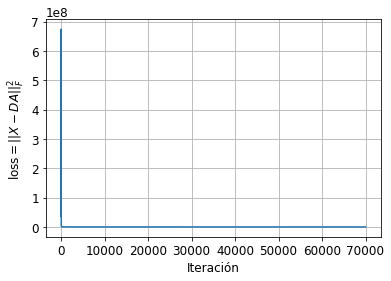

In [36]:
plot_loss(losses_sc)

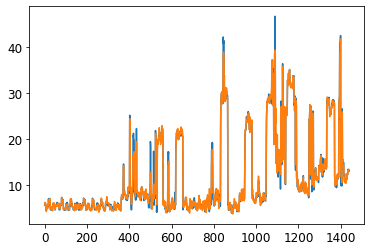

In [37]:
plt.plot(X[:, 1])
X_pred = D@A_sc
plt.plot(X_pred[:, 1])

In [19]:
X_pred = D@A_sc

In [27]:
A_sc[:,1][A_sc[:,1]>0.01]

array([1.], dtype=float32)

In [30]:
d = D[:,1]

In [ ]:
d = 0
for i in range()